<a href="https://colab.research.google.com/github/bgalerne/M2MAS_neural_networks/blob/main/M2MAS_DermMNIST_classification_202223.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet final pour le cours M2MAS "Réseaux de Neurones profonds pour l'Apprentissage", année 2022-2023

Fichier ```NOM_Prenom_M2MAS_DermMNIST_classification_202223.ipynb``` à envoyer par email à `bruno.galerne@univ-orleans.fr` pour le lundi 27 février 2023.

Envoi d'un lien à partir d'un cloud (partage renater, dropbox, google drive,...) si la taille du fichier est supérieur à 5 Mo.

# Classification of the DermMNIST database


*Reference:*
 - [MedMNIST v2](https://medmnist.com/): A Large-Scale Lightweight Benchmark for 2D and 3D Biomedical Image Classification, Jiancheng Yang,Rui Shi,Donglai Wei,Zequan Liu,Lin Zhao,Bilian Ke,Hanspeter Pfister,Bingbing Ni, 2021.
Paper [arXiv](https://arxiv.org/pdf/2110.14795.pdf) Code [GitHub](https://github.com/MedMNIST/MedMNIST)



In [ ]:
!pip install medmnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116949 sha256=6c89d169cd21ef4ea625bf8becb18a9507d8a05afc2b53d8ab8aa6800461de44
  Stored in directory: /root/.cache/pip/wheels/5b/eb/43/7295e71293b218ddfd627f935229bf54af9018add7fbb5aac6
Successfully built fire


Import necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import medmnist
print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

MedMNIST v2.1.0 @ https://github.com/MedMNIST/MedMNIST/
cuda


Downlaod dataset and define dataloaders

In [ ]:
info = medmnist.INFO['dermamnist']

for cell in info:
  print(cell)
  print(info[cell])
  print('\n')



python_class
DermaMNIST


description
The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.


url
https://zenodo.org/record/6496656/files/dermamnist.npz?download=1


MD5
0744692d530f8e62ec473284d019b0c7


task
multi-class


label
{'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}


n_channels
3


n_samples
{'train': 7007, 'val': 1003, 'test': 2005}


license
CC BY 4.0




In [ ]:
BATCH_SIZE = 128

# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
DataClass = getattr(medmnist, info['python_class'])
train_dataset = DataClass(split='train', transform=data_transform, download=True)
val_dataset = DataClass(split='val', transform=data_transform, download=True)
test_dataset = DataClass(split='test', transform=data_transform, download=True)

print(train_dataset)
print("===================")
print(test_dataset)
print("===================")
print(val_dataset)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = data.DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

  0%|          | 0/19725078 [00:00<?, ?it/s]

Using downloaded and verified file: /root/.medmnist/dermamnist.npz
Using downloaded and verified file: /root/.medmnist/dermamnist.npz
Dataset DermaMNIST (dermamnist)
    Number of datapoints: 7007
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}
    Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
    Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 a

Display function ```montage``` provided by MEDMNIST

In [ ]:
train_dataset.montage(1)

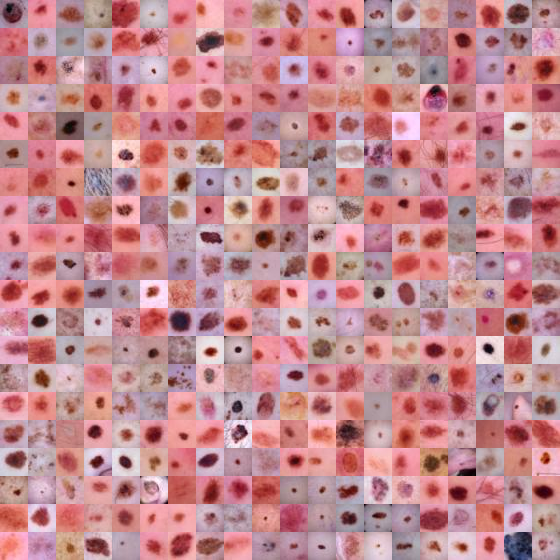

In [ ]:
train_dataset.montage(20)

Function to display a list of images (e.g. from a batch) :

Images:


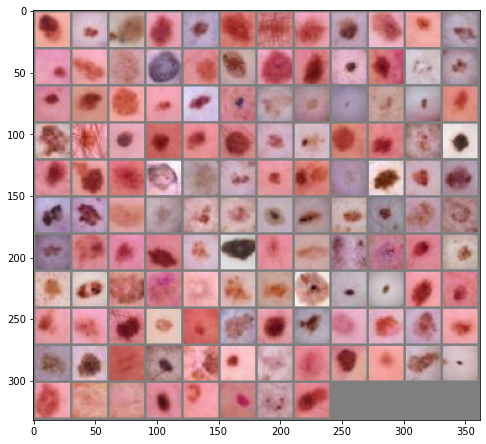

Class: 0 Name: actinic keratoses and intraepithelial carcinoma
6 images


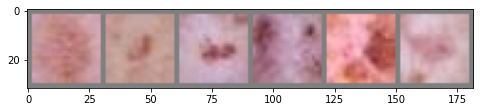

Class: 1 Name: basal cell carcinoma
6 images


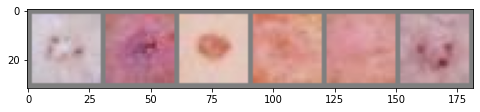

Class: 2 Name: benign keratosis-like lesions
13 images


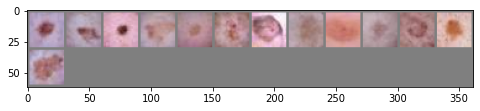

Class: 3 Name: dermatofibroma
3 images


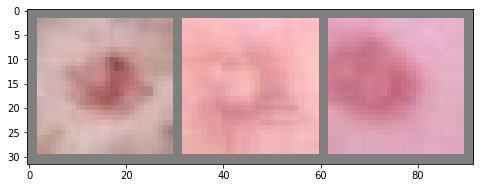

Class: 4 Name: melanoma
10 images


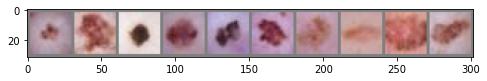

Class: 5 Name: melanocytic nevi
89 images


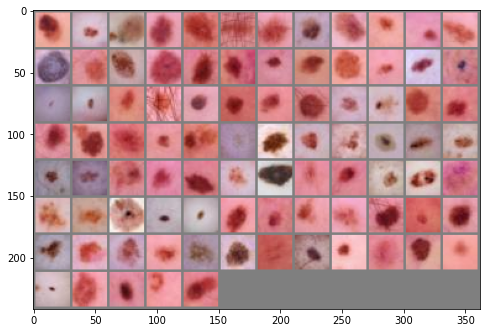

Class: 6 Name: vascular lesions
1 images


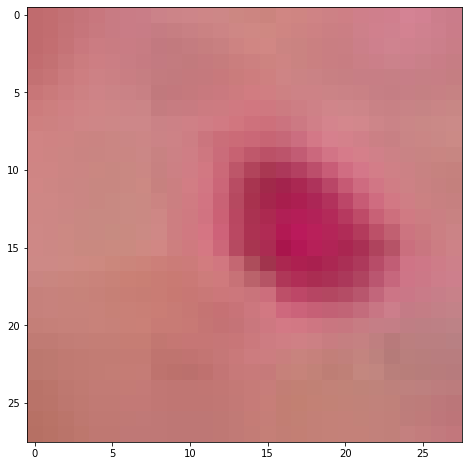

In [ ]:
def imshow(img):
    img = img.clone().detach().to('cpu')*0.5 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(8,8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images:
print('Images:')
imshow(torchvision.utils.make_grid(images, nrow=12))

# show images for each class:
for k in info['label']:
  print("Class:", k, "Name:", info['label'][k])
  # get some random training images
  # show images
  idx = (labels==int(k)).view(-1)
  print(idx.sum().item(), 'images')
  if idx.sum()>0:
    imshow(torchvision.utils.make_grid(images[idx,:,:,:], nrow=12))


## Question 1: Answer the questions with both a code cell and a text cell

  1. What is the size of an image from the dataset ? 

  2. How many images are in each split train/val/test ?

  3. What is the number of classes ?

  4. Are the classes well-balanced in the training set ? (compute the number of images per class in the training set)

### Answer: 

1.

2.

3.

4.


# A first neural network for classification:



We will classify the ```DermMNIST``` images using the following CNN architecture.


* CNN part: All 2D convolutions have kernel size 3x3.
  * A 2D convolution with 16 ouput chanels, followed by ReLU.
  * A 2D convolution with 16 ouput chanels, followed by ReLU.
  * A 2D max-pooling with size 2x2
  * A 2D convolution with 64 ouput chanels, followed by ReLU.
  * A 2D convolution with 64 ouput chanels, followed by ReLU.
  * A 2D convolution with 64 ouput chanels, followed by ReLU.
  * A 2D max-pooling with size 2x2 
* Fully connected part:
  * A linear layer with output dimension 128, followed by ReLU.
  * A linear layer with output dimension 128, followed by ReLU.
  * A last linear layer



## Question 2.a:

For each step of the forward function of the CNN, precise the size of the batch of the tensor starting from a tensor of size $b \times  c \times h \times w$ where $c \times h \times w$ are the answers of question 1.1.


### Answer:

## Question 2.b:

Recall the name and the mathematical expression of the training loss that will be used to train the network.


### Answer:

With equation:
$$
\log(\exp(x))=x
$$

## Question 3:

1. Define a class ```Net``` that implements in PyTorch the considered architecture for ```DermMNIST``` classification.

2. Check that the forward function is well-defined by applying.



In [ ]:
# TODO : Define class Net here



In [ ]:
# TODO : Check that the forward function is well-defined.



## Question 4:

The goal of this question is to train a neural network of your class ```model=Net()``` to classify the ```DermMNIST``` dataset.

Define a function ```train``` with the necessary arguments that:
 * runs for ```n_epochs``` epochs
 * uses the optimizer
    ```
    lr = 0.001
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    ```
 * at each epoch, computes the *epoch loss* (that is the mean of the training loss on each batch of the training set), and the end of each epoch, computes
the classification accuracy on the validation set.
 * print at the end of the training the time spent for training **in minutes and seconds**.
 * displays at the end of the training the two plots of running loss VS epochs and accuracy on validation set VS epochs.
 * displays at the end of the training a classification report and a confusion matrix on the validation set using scikit-learn.

Apply your function to train for ```n_epochs = 6```.

In [ ]:
# TODO: training



## Question 5: 

Define a new function called ```train_gpu``` that does the same as the ```train``` function above with the training executed on the GPU. 

Discuss before all the changes that needs to be done.

Report and discuss the difference of execution times.


### Answer: 

In [ ]:
# TODO: training on GPU:



### Answer: 

## Question 6: 

Do a new training on the GPU using 40 epochs (be careful to initialize a new network).

Discuss the performance of the final model.

In [ ]:
# TODO: training on GPU with 40 epochs:



### Answer:

# A second neural network for classification:



## Question 7:

We will now try to improve the architecture by introducing batch normalization layers within the network.

1. Define a new class ```Net_with_BN``` that adds a 2D batchnormalization layer between each 2D-convolution layer and ReLU activation layer (that is after the 2D convolution and before ReLU). 

2. Train a model ```model_with_bn = Net_with_BN()``` using your training function ```train_gpu```.
Hint: You may complete your function with:
```
model_with_bn.train()  # before training
model_with_bn.eval()   # before prediction
```

3. Are the performances similar ? What is the interest of using batchnormalization layers ?



In [ ]:
# TODO: Define class Net_with_BN:



In [ ]:
# TODO: Train a model_with_bn = Net_with_BN():



### Answer:



## Question 8:
What is the proper way to determine which model is the best between the trained ```model``` from class ```Net()``` and the trained ```model_with_bn``` from class ```model_with_bn = Net_with_BN()``` ?

Propose a script to answer this question.

### Answer:

In [ ]:
# Code: Script for best model



### Answer: